In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Columns

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

### Problem statement : To predict Chance of Admit (A countinous value) with given feature 

### Features :

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

### Target Variable :

Chance of Admit (ranging from 0 to 1)

In [2]:
df=pd.read_csv("d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_001_839_original_Jamboree_Admission.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
#Shape of the data set
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### There are no missing values or any nan values in the data set

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Some features are countinous and some are descrete in nature

In [7]:
#Un wanted column
df=df.drop(columns="Serial No.")

### Lets Assume that we dont have test data now , we will use it final after model building

In [8]:
#Spliting 15% if data for testing unseen to us
Y=df['Chance of Admit ']
X=df.drop(columns="Chance of Admit ")
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
df_Train=X_train
df_Train["Chance of Admit"]=y_train

In [9]:
df_Train.reset_index(inplace=True)
df_Train.drop(columns="index",inplace=True)
df_Train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,321,111,3,3.5,4.0,8.83,1,0.77
1,316,111,4,4.0,5.0,8.54,0,0.71
2,303,102,3,3.5,3.0,8.50,0,0.62
3,314,107,2,2.5,4.0,8.27,0,0.72
4,308,106,3,3.5,2.5,8.21,1,0.75
...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.5,9.18,1,0.87
396,306,105,2,2.5,3.0,8.22,1,0.72
397,302,99,1,2.0,2.0,7.25,0,0.57
398,309,105,2,2.5,4.0,7.68,0,0.55


####  We have 425 data set for EDA ,a small data set

In [10]:
df_Train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.727500,107.335000,3.112500,3.375000,3.480000,8.580750,0.555000,0.724175
std,10.969232,6.091432,1.145917,0.987072,0.921533,0.601328,0.497588,0.140564
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.137500,0.000000,0.637500
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000,0.730000
75%,324.250000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [12]:
df_Train.shape

(400, 8)

### Univarient and bi-Varient Analysis 

#### Columns which can be considered as descrite or catagorical

In [13]:
df_Train["SOP"].value_counts()

4.0    75
3.5    73
3.0    59
2.5    52
4.5    47
2.0    36
5.0    34
1.5    20
1.0     4
Name: SOP, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP', ylabel='count'>

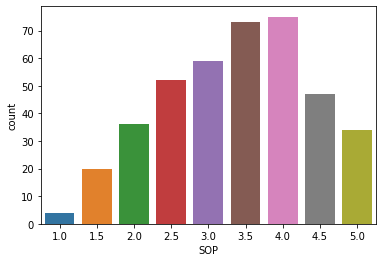

In [14]:
sns.countplot(df_Train["SOP"])

SOP can be considered as descrite since it takes a finite set of values

mode of SOP is 3.5


In [15]:
df_Train["LOR "].value_counts()

3.0    81
4.0    75
3.5    69
4.5    49
5.0    40
2.5    40
2.0    36
1.5    10
Name: LOR , dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR ', ylabel='count'>

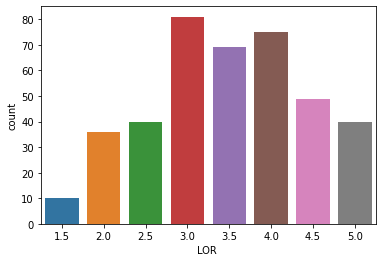

In [16]:
sns.countplot(df_Train["LOR "])

mode of LOR is 3.0

In [17]:
df_Train["University Rating"].value_counts()

3    132
2    101
4     80
5     60
1     27
Name: University Rating, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Rating', ylabel='count'>

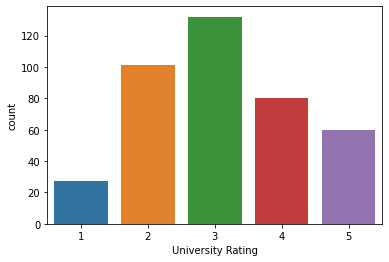

In [18]:
sns.countplot(df_Train["University Rating"])

Mode university rating is 3

In [19]:
df_Train["Research"].value_counts()

1    222
0    178
Name: Research, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research', ylabel='count'>

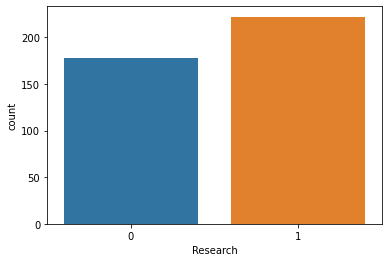

In [20]:
sns.countplot(df_Train["Research"])

#### Columns which can be considered as Countinous

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

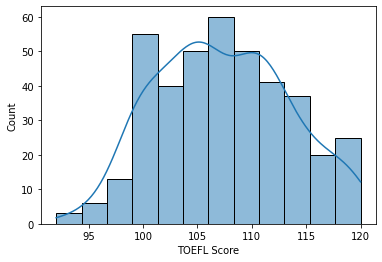

In [21]:
sns.histplot(df_Train["TOEFL Score"],kde=True)

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

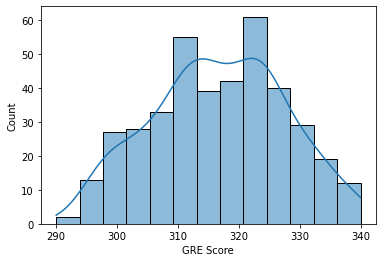

In [22]:
sns.histplot(df_Train["GRE Score"],kde=True)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

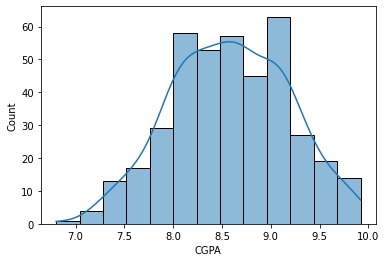

In [23]:
sns.histplot(df_Train["CGPA"],kde=True)

<AxesSubplot:xlabel='Chance of Admit', ylabel='Count'>

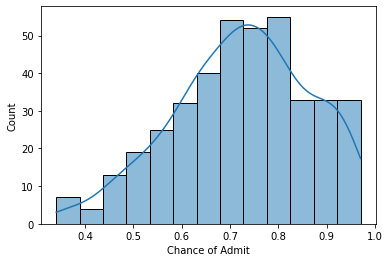

In [24]:
sns.histplot(df_Train["Chance of Admit"],kde=True)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

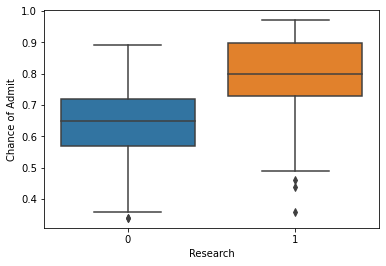

In [25]:
sns.boxplot(x=df_Train['Research'],y=df_Train['Chance of Admit'])

#### students who have done their research have good chance of getting admission

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

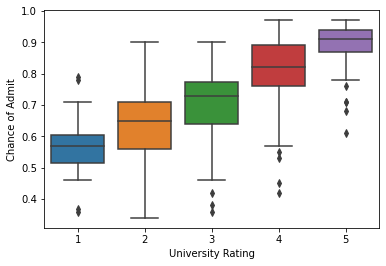

In [26]:
sns.boxplot(x=df_Train['University Rating'],y=df_Train['Chance of Admit'])

#### usually High rating university accpets the students who have high probaility of admission

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

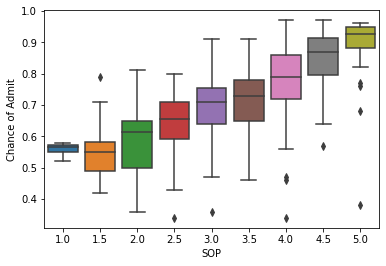

In [27]:
sns.boxplot(x=df_Train['SOP'],y=df_Train['Chance of Admit'])

#### Students have high chance of Admission who has SOP rating high

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit'>

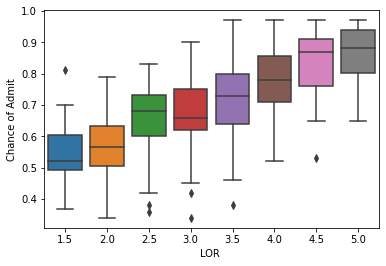

In [28]:
sns.boxplot(x=df_Train['LOR '],y=df_Train['Chance of Admit'])

#### Students have high chance of Admission who has LOR rating high

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

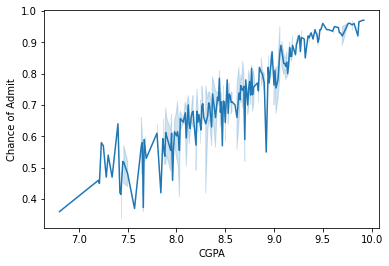

In [29]:
sns.lineplot(x=df_Train['CGPA'],y=df_Train['Chance of Admit'],)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

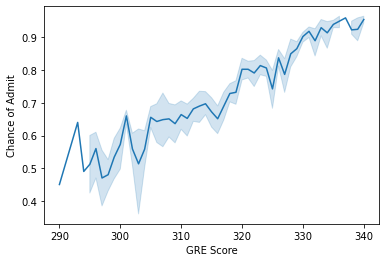

In [30]:
sns.lineplot(x=df_Train['GRE Score'],y=df_Train['Chance of Admit'])

#### As CGPA or GRE score increases the chance of Admission increase

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

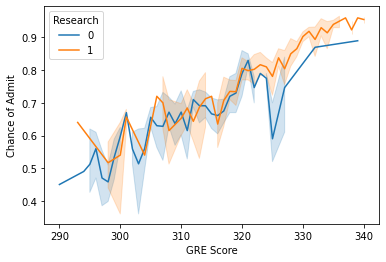

In [31]:
sns.lineplot(x=df_Train['GRE Score'],y=df_Train['Chance of Admit'],hue=df_Train['Research'])

<AxesSubplot:>

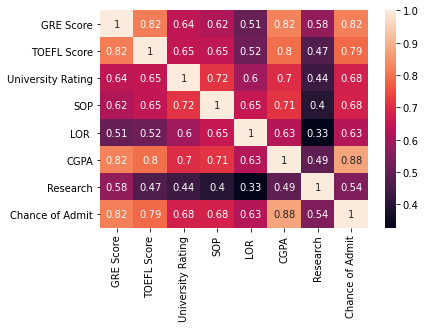

In [32]:
sns.heatmap(df_Train.corr(),annot=True)

#### Corelation heat map 
##### we can see some columuns are corelated with other columns eg (Chance of admit with GRE)

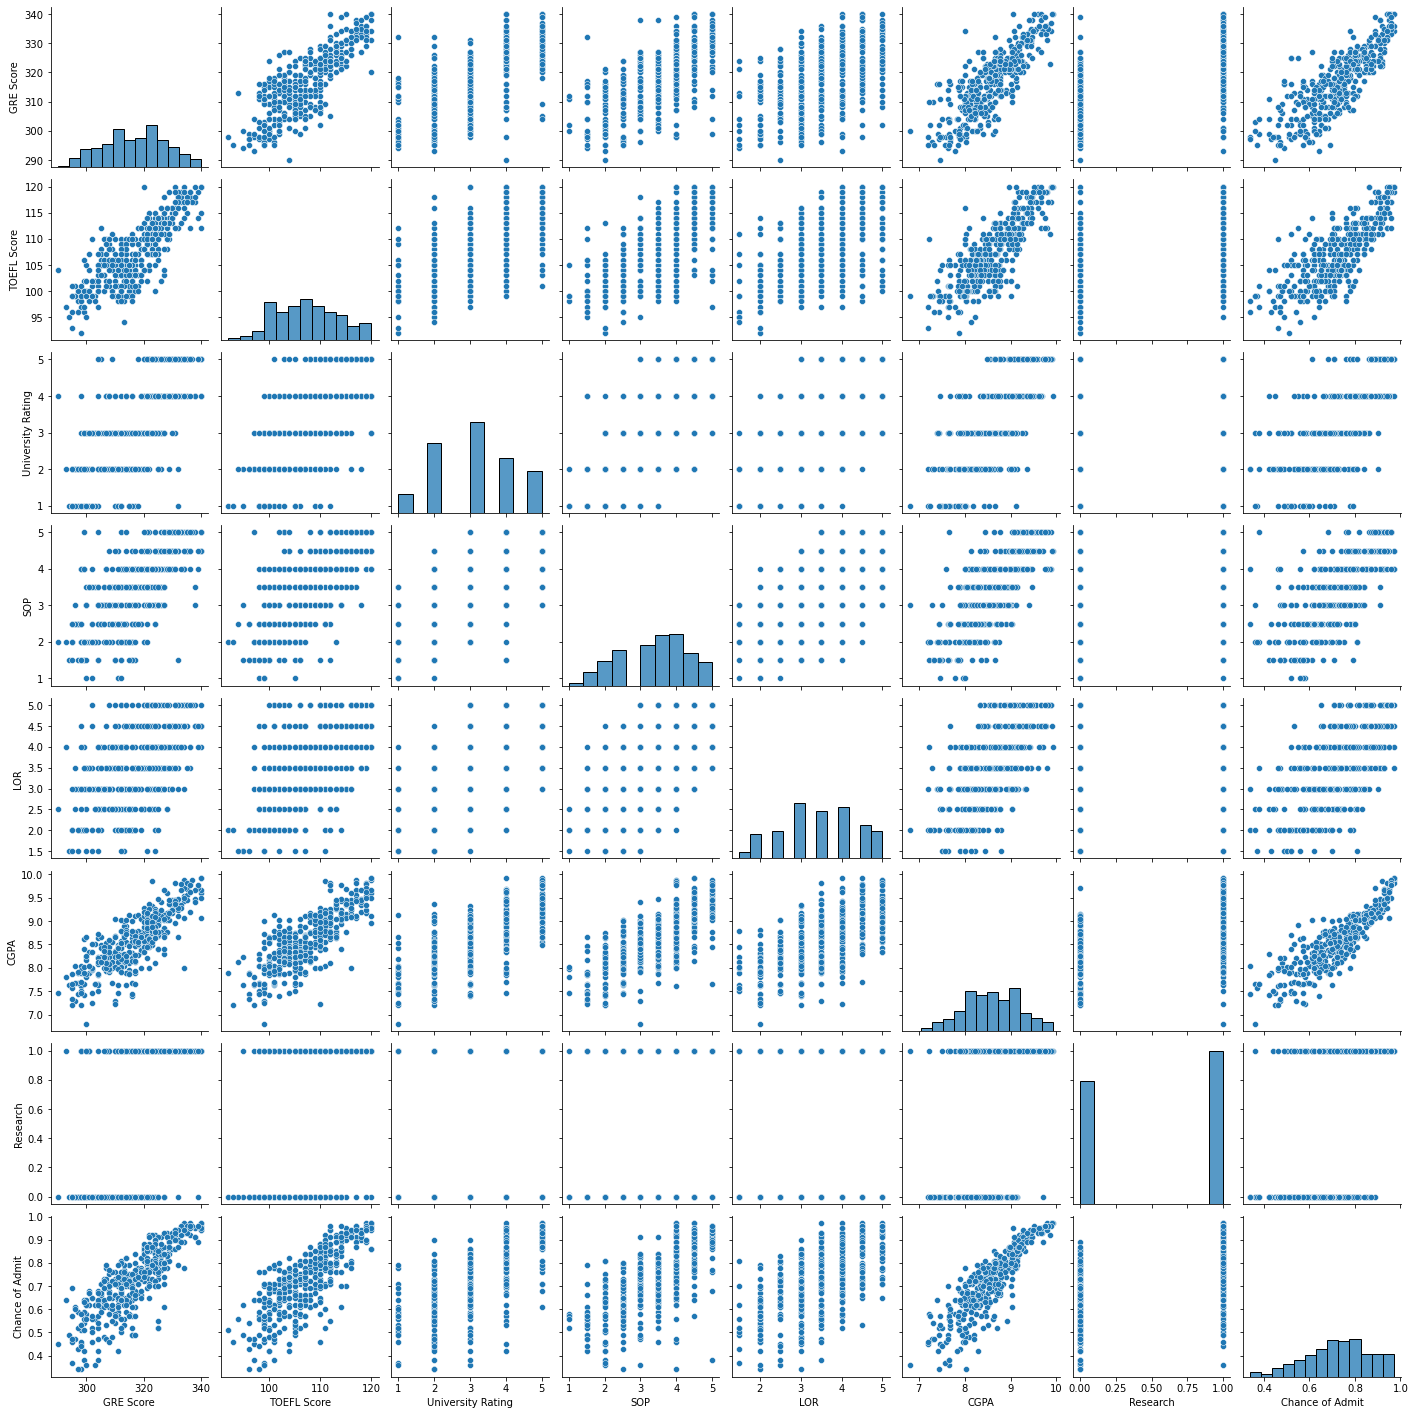

In [33]:
sns.pairplot(df_Train)

### Checking Outliers

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chance of Admit '>

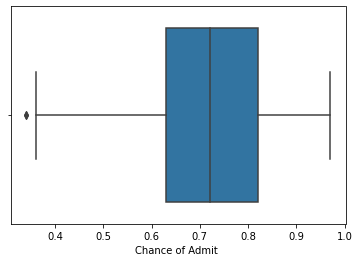

In [34]:
sns.boxplot(df['Chance of Admit '])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score'>

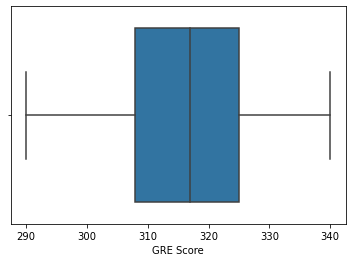

In [35]:
sns.boxplot(df['GRE Score'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL Score'>

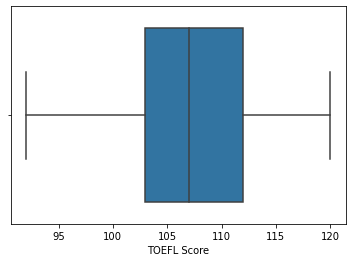

In [36]:
sns.boxplot(df['TOEFL Score'])

#### There are no outliers 

In [37]:
#Spliting for validation and training the model

Y1=df_Train['Chance of Admit']
X1=df_Train.drop(columns="Chance of Admit")
X_train, X_val, y_train, y_val = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [38]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,314,107,2,2.5,4.0,8.27,0
18,290,104,4,2.0,2.5,7.46,0
202,328,108,4,4.5,4.0,9.18,1
250,321,114,4,4.0,5.0,9.12,0
274,314,104,4,5.0,5.0,9.02,0
...,...,...,...,...,...,...,...
71,309,104,2,2.0,2.5,8.26,0
106,318,112,3,4.0,3.5,8.67,0
270,298,98,2,1.5,2.5,7.50,1
348,321,102,3,3.5,4.0,9.01,1


#### Training the model with statsmodels

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Test the assumptions of linear regression:

#### Checking for Multicollinearity usiing VIF

In [40]:
X =X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

             feature          VIF
0          GRE Score  1316.790049
1        TOEFL Score  1164.447151
2  University Rating    21.445031
3                SOP    34.484495
4               LOR     29.034340
5               CGPA   995.639817
6           Research     2.932189


#### We need to scale first before using VIF

In [41]:
#Standard Scalar mean=0 std =1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.272000,-0.056712,-1.033938,-0.931349,0.565174,-0.535566,-1.112548
1,-2.423346,-0.534284,0.735368,-1.444313,-1.059278,-1.876290,-1.112548
2,0.982953,0.102479,0.735368,1.120505,0.565174,0.970680,0.898838
3,0.355476,1.057625,0.735368,0.607541,1.648141,0.871367,-1.112548
4,-0.272000,-0.534284,0.735368,1.633468,1.648141,0.705846,-1.112548
...,...,...,...,...,...,...,...
315,-0.720197,-0.534284,-1.033938,-1.444313,-1.059278,-0.552118,-1.112548
316,0.086558,0.739243,-0.149285,0.607541,0.023690,0.126521,-1.112548
317,-1.706231,-1.489430,-1.033938,-1.957276,-1.059278,-1.810081,0.898838
318,0.355476,-0.852666,-0.149285,0.094578,0.565174,0.689294,0.898838


In [42]:
X =X_train

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

             feature       VIF
0          GRE Score  4.810672
1        TOEFL Score  4.010787
2  University Rating  2.582778
3                SOP  2.669448
4               LOR   1.911827
5               CGPA  4.951053
6           Research  1.582583


### Training the model

In [43]:
import statsmodels.api as sm
X =X_train_scaled
y =y_train
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

C:\Users\Abhilash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Abhilash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.86e-112
Time:                        22:51:43   Log-Likelihood:                 440.27
No. Observations:                 320   AIC:                            -864.5
Df Residuals:                     312   BIC:                            -834.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.003    209.502      0.0

### Model Interpretability and Feature Importance

#### X6 ---> has a high weight 0.0686 [CGPA]

#### X1 and X2 --->  has next high weight 0.02 [GRE Score ,TOEFL Score ]

these feature are deciding feature for our target variable

#### Test the assumptions of linear regression :

##### Normality of residuals

<AxesSubplot:ylabel='Density'>

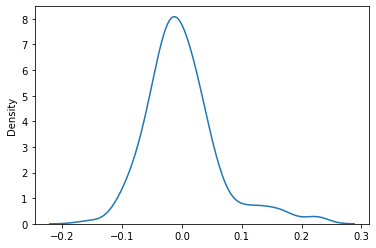

In [45]:
y_train_predicted=results.fittedvalues
resudials=y_train_predicted-y_train
sns.kdeplot(resudials)

#### Residials are normal

#### Test for Homoscedasticity

Text(0, 0.5, 'Residuals')

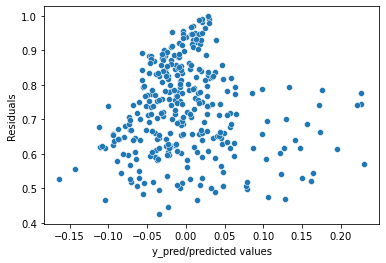

In [46]:
sns.scatterplot(x=resudials,y=y_train_predicted)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

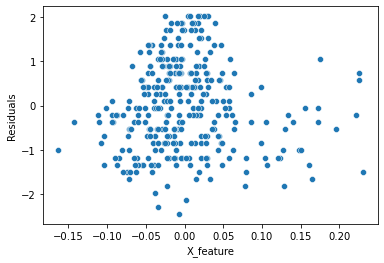

In [47]:
sns.scatterplot(x=resudials,y=X_train_scaled[:,1])
plt.xlabel('X_feature')
plt.ylabel('Residuals')

#### variance are in range 

### Check for Auto Co-relation

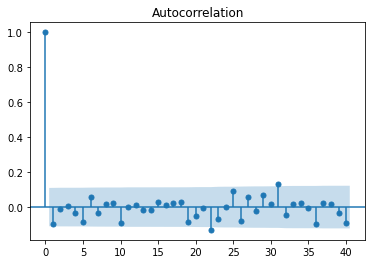

In [48]:
sm.graphics.tsa.plot_acf(resudials, lags=40)
plt.show()

#### Looks like there is some kind of Auto-corrr

### Checking our model for validation set

In [49]:
X_val=scaler.transform(X_val)
X_val = sm.add_constant(X_val)
results.predict(X_val)

array([0.95247301, 0.8203729 , 0.5121543 , 0.60301263, 0.46529369,
       0.61949447, 0.73821666, 0.68970289, 0.68357223, 0.70027342,
       0.67932192, 0.45140695, 0.74933438, 0.69692854, 0.58341823,
       0.82130081, 0.6497617 , 0.61190836, 0.85558207, 0.66422913,
       0.63795155, 0.8267926 , 0.82168708, 0.90383823, 0.79579784,
       0.65295165, 0.69327237, 0.77824447, 0.90751223, 0.68760923,
       0.86629077, 0.70136114, 0.53719568, 0.80119661, 0.85821451,
       0.94064779, 0.70108817, 0.58565454, 0.82486337, 0.67524853,
       0.91244574, 0.61905212, 0.73588329, 0.69058373, 0.5747363 ,
       0.65238962, 0.63112437, 0.68545811, 0.72884494, 0.77657957,
       0.96281874, 0.77312636, 0.65405378, 0.5347526 , 0.64490163,
       0.6662681 , 0.76547656, 0.70994487, 0.72789469, 0.62140226,
       0.7734901 , 0.68393234, 0.73527348, 0.80943011, 0.88061963,
       0.72347241, 0.62960973, 0.70414328, 0.95961763, 0.4906622 ,
       0.80552553, 0.70294391, 0.54025024, 0.64624556, 0.92580

In [50]:
y_predicted_valid=results.predict(X_val)


In [51]:
#MSE
mean_squared_error(y_val,y_predicted_valid)

0.002809786486950893

In [52]:
#r-2 score
r2_score(y_val,y_predicted_valid)

0.8237211013907553

#### From this we find the training r2 score is 0.82 and validation r2 score is 0.76 
##### lets try some polynimail feature

In [53]:
poly=PolynomialFeatures(2)
poly.fit(X_train_scaled)
X_train_scaled_poly=poly.transform(X_train_scaled)
colums=poly.get_feature_names(X_train.columns)
X_train_scaled_poly=pd.DataFrame(X_train_scaled_poly,columns=colums)
X_train_scaled_poly.drop(columns="1",inplace=True)
X_train_scaled_poly


C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GRE Score^2,GRE Score TOEFL Score,GRE Score University Rating,...,SOP^2,SOP LOR,SOP CGPA,SOP Research,LOR ^2,LOR CGPA,LOR Research,CGPA^2,CGPA Research,Research^2
0,-0.272000,-0.056712,-1.033938,-0.931349,0.565174,-0.535566,-1.112548,0.073984,0.015426,0.281231,...,0.867412,-0.526374,0.498799,1.036170,0.319421,-0.302688,-0.628783,0.286830,0.595842,1.237762
1,-2.423346,-0.534284,0.735368,-1.444313,-1.059278,-1.876290,-1.112548,5.872608,1.294756,-1.782051,...,2.086039,1.529928,2.709949,1.606867,1.122069,1.987512,1.178497,3.520463,2.087462,1.237762
2,0.982953,0.102479,0.735368,1.120505,0.565174,0.970680,0.898838,0.966196,0.100732,0.722832,...,1.255531,0.633280,1.087652,1.007152,0.319421,0.548603,0.508000,0.942220,0.872484,0.807910
3,0.355476,1.057625,0.735368,0.607541,1.648141,0.871367,-1.112548,0.126363,0.375961,0.261406,...,0.369106,1.001314,0.529391,-0.675918,2.716370,1.436137,-1.833636,0.759281,-0.969438,1.237762
4,-0.272000,-0.534284,0.735368,1.633468,1.648141,0.705846,-1.112548,0.073984,0.145325,-0.200020,...,2.668218,2.692186,1.152977,-1.817311,2.716370,1.163334,-1.833636,0.498218,-0.785287,1.237762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,-0.720197,-0.534284,-1.033938,-1.444313,-1.059278,-0.552118,-1.112548,0.518684,0.384790,0.744639,...,2.086039,1.529928,0.797431,1.606867,1.122069,0.584846,1.178497,0.304834,0.614257,1.237762
316,0.086558,0.739243,-0.149285,0.607541,0.023690,0.126521,-1.112548,0.007492,0.063987,-0.012922,...,0.369106,0.014393,0.076866,-0.675918,0.000561,0.002997,-0.026356,0.016007,-0.140760,1.237762
317,-1.706231,-1.489430,-1.033938,-1.957276,-1.059278,-1.810081,0.898838,2.911224,2.541311,1.764138,...,3.830930,2.073299,3.542829,-1.759274,1.122069,1.917379,-0.952119,3.276394,-1.626970,0.807910
318,0.355476,-0.852666,-0.149285,0.094578,0.565174,0.689294,0.898838,0.126363,-0.303103,-0.053067,...,0.008945,0.053453,0.065192,0.085010,0.319421,0.389571,0.508000,0.475126,0.619563,0.807910


In [54]:
colums

['1',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'GRE Score^2',
 'GRE Score TOEFL Score',
 'GRE Score University Rating',
 'GRE Score SOP',
 'GRE Score LOR ',
 'GRE Score CGPA',
 'GRE Score Research',
 'TOEFL Score^2',
 'TOEFL Score University Rating',
 'TOEFL Score SOP',
 'TOEFL Score LOR ',
 'TOEFL Score CGPA',
 'TOEFL Score Research',
 'University Rating^2',
 'University Rating SOP',
 'University Rating LOR ',
 'University Rating CGPA',
 'University Rating Research',
 'SOP^2',
 'SOP LOR ',
 'SOP CGPA',
 'SOP Research',
 'LOR ^2',
 'LOR  CGPA',
 'LOR  Research',
 'CGPA^2',
 'CGPA Research',
 'Research^2']

In [55]:
X =X_train_scaled_poly

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                          feature        VIF
0                       GRE Score   6.276398
1                     TOEFL Score   5.106269
2               University Rating   3.088521
3                             SOP   3.357683
4                            LOR    2.214591
5                            CGPA   5.811859
6                        Research   2.074576
7                     GRE Score^2  16.530975
8           GRE Score TOEFL Score  28.244652
9     GRE Score University Rating  12.446667
10                  GRE Score SOP  13.052705
11                 GRE Score LOR   11.588143
12                 GRE Score CGPA  28.678774
13             GRE Score Research   5.714051
14                  TOEFL Score^2   9.850274
15  TOEFL Score University Rating   9.334005
16                TOEFL Score SOP  12.635014
17               TOEFL Score LOR    7.749190
18               TOEFL Score CGPA  24.152508
19           TOEFL Score Research   5.380679
20            University Rating^2   4.554637
21        

In [56]:
final_col=vif_data[(vif_data['VIF']>1) & (vif_data['VIF']<5)]['feature']
final_col=list(final_col)
X_train_sc_poly_vif=X_train_scaled_poly[final_col]
X_train_sc_poly_vif

,University Rating,SOP,LOR,Research,University Rating^2,University Rating Research,SOP Research,LOR ^2,LOR Research
0,-1.033938,-0.931349,0.565174,-1.112548,1.069029,1.150306,1.036170,0.319421,-0.628783
1,0.735368,-1.444313,-1.059278,-1.112548,0.540766,-0.818132,1.606867,1.122069,1.178497
2,0.735368,1.120505,0.565174,0.898838,0.540766,0.660977,1.007152,0.319421,0.508000
3,0.735368,0.607541,1.648141,-1.112548,0.540766,-0.818132,-0.675918,2.716370,-1.833636
4,0.735368,1.633468,1.648141,-1.112548,0.540766,-0.818132,-1.817311,2.716370,-1.833636
...,...,...,...,...,...,...,...,...,...
315,-1.033938,-1.444313,-1.059278,-1.112548,1.069029,1.150306,1.606867,1.122069,1.178497
316,-0.149285,0.607541,0.023690,-1.112548,0.022286,0.166087,-0.675918,0.000561,-0.026356
317,-1.033938,-1.957276,-1.059278,0.898838,1.069029,-0.929343,-1.759274,1.122069,-0.952119
318,-0.149285,0.094578,0.565174,0.898838,0.022286,-0.134183,0.085010,0.319421,0.508000


In [57]:
X =X_train_sc_poly_vif

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)
final_col=vif_data[(vif_data['VIF']>1) & (vif_data['VIF']<5)]['feature']
final_col=list(final_col)
X_train_sc_poly_vif=X_train_scaled_poly[final_col]

                      feature       VIF
0           University Rating  2.314092
1                         SOP  2.412025
2                        LOR   1.794422
3                    Research  1.357772
4         University Rating^2  2.041999
5  University Rating Research  2.633161
6                SOP Research  2.357020
7                      LOR ^2  1.656541
8               LOR  Research  1.895484


In [58]:
X_train_sc_poly_vif

,University Rating,SOP,LOR,Research,University Rating^2,University Rating Research,SOP Research,LOR ^2,LOR Research
0,-1.033938,-0.931349,0.565174,-1.112548,1.069029,1.150306,1.036170,0.319421,-0.628783
1,0.735368,-1.444313,-1.059278,-1.112548,0.540766,-0.818132,1.606867,1.122069,1.178497
2,0.735368,1.120505,0.565174,0.898838,0.540766,0.660977,1.007152,0.319421,0.508000
3,0.735368,0.607541,1.648141,-1.112548,0.540766,-0.818132,-0.675918,2.716370,-1.833636
4,0.735368,1.633468,1.648141,-1.112548,0.540766,-0.818132,-1.817311,2.716370,-1.833636
...,...,...,...,...,...,...,...,...,...
315,-1.033938,-1.444313,-1.059278,-1.112548,1.069029,1.150306,1.606867,1.122069,1.178497
316,-0.149285,0.607541,0.023690,-1.112548,0.022286,0.166087,-0.675918,0.000561,-0.026356
317,-1.033938,-1.957276,-1.059278,0.898838,1.069029,-0.929343,-1.759274,1.122069,-0.952119
318,-0.149285,0.094578,0.565174,0.898838,0.022286,-0.134183,0.085010,0.319421,0.508000


In [59]:
X =X_train_sc_poly_vif
y =y_train
X = sm.add_constant(X)
model1 = sm.OLS(y.values, X)
results1 = model1.fit()

C:\Users\Abhilash\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [60]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     72.96
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.05e-71
Time:                        22:51:44   Log-Likelihood:                 348.73
No. Observations:                 320   AIC:                            -677.5
Df Residuals:                     310   BIC:                            -639.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### our training r2 score for this ploynimal(2) feature is 0.75 which is much low the our single degree feature 0.83 , So we will go without polynomial feature

In [61]:
##Lets train our whole data 

In [62]:
X1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,321,111,3,3.5,4.0,8.83,1
1,316,111,4,4.0,5.0,8.54,0
2,303,102,3,3.5,3.0,8.50,0
3,314,107,2,2.5,4.0,8.27,0
4,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.5,9.18,1
396,306,105,2,2.5,3.0,8.22,1
397,302,99,1,2.0,2.0,7.25,0
398,309,105,2,2.5,4.0,7.68,0


In [63]:
Y1

0      0.77
1      0.71
2      0.62
3      0.72
4      0.75
       ... 
395    0.87
396    0.72
397    0.57
398    0.55
399    0.62
Name: Chance of Admit, Length: 400, dtype: float64

In [64]:
scaler = StandardScaler()
scaler.fit(X1)
X_train_scaled=scaler.transform(X1)
X_train=pd.DataFrame(X_train_scaled,columns=X1.columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


In [65]:
X =X_train
y =Y1
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

C:\Users\Abhilash\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [66]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.41e-142
Time:                        22:51:45   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

### Final Testing

In [67]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [68]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [69]:
X_test=scaler.transform(X_test)
X_test = sm.add_constant(X_test)
y_predicted_test=results.predict(X_test)


In [70]:
y_predicted_test

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [71]:
#MSE for TEST data
mean_squared_error(y_test,y_predicted_test)

0.0037046553987884114

In [72]:
#R-2 for TEST data
r2_score(y_test,y_predicted_test)

0.8188432567829628

## FINAL RESULT OF OLS MODEL

#### final test r2 score is 0.81 

#### Since training r2 score which os 0.82 and test r2 score which is 0.81 your model have low varience and low bias.
--------------------------------------------------------------------------------------------------------------------------------

##### Feature imporatnce and Model Inter :
features       ------------       weights
###### const        ---------------         0.7242      
###### GRE Score   --------------          0.0267      
###### TOEFL Score    ---------------       0.0182      
###### University Rating  ----------   0.0029      
###### SOP          --------------         0.0018      
###### LOR          ---------------         0.0159      
###### CGPA          -------------        0.0676      
###### Research    -----------------          0.0119

#### CGPA > GRE Score > TOEFL Score

--------------------------------------------------------------------------------------------------------------------------------
#### since we have less data its better to use simple model , without any poolynomial variables .

##### Majority of our assumtions are checked .








### Implementing Leniear Regression using Sklearn with Hyper-parameter tuning

In [73]:
df=pd.read_csv("d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_001_839_original_Jamboree_Admission.csv")

In [74]:
df=df.drop(columns="Serial No.")

In [75]:
Y=df['Chance of Admit ']
X=df.drop(columns="Chance of Admit ")
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [76]:

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'reg__alpha': [0.001,0.01, 0.1, 1.0, 10.0],
    'reg__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}
num_folds = 5
kf = KFold(n_splits=num_folds)
scaler = StandardScaler()
model = Pipeline([
    ('poly', PolynomialFeatures()),('scaler',scaler),
    ('reg', SGDRegressor(penalty='elasticnet'))
])
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')
# grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error', refit=False)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Abhilash\anaconda3\lib\site-package

In [77]:
print(best_model)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('reg',
                 SGDRegressor(alpha=0.001, l1_ratio=0.5,
                              penalty='elasticnet'))])


In [78]:
print(best_params)

{'poly__degree': 1, 'reg__alpha': 0.001, 'reg__l1_ratio': 0.5}


In [80]:
poly=PolynomialFeatures(1)
poly.fit(X_train)
X_train_scaled_poly=poly.transform(X_train)
colums=poly.get_feature_names(X_train.columns)
X_train_scaled_poly=pd.DataFrame(X_train_scaled_poly,columns=colums)

C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
scaler = StandardScaler()
scaler.fit(X_train_scaled_poly)
X_train_scaled_poly=scaler.transform(X_train_scaled_poly)

In [82]:
sgd_final=SGDRegressor(alpha=0.001, l1_ratio=0.5,
                              penalty='elasticnet',verbose=True)

In [83]:
sgd_final.fit(X_train_scaled_poly,y_train)

-- Epoch 1
Norm: 0.06, NNZs: 7, Bias: 0.506076, T: 400, Avg. loss: 0.087388
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 7, Bias: 0.627494, T: 800, Avg. loss: 0.013501
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 7, Bias: 0.676524, T: 1200, Avg. loss: 0.004350
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 7, Bias: 0.699242, T: 1600, Avg. loss: 0.002460
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 7, Bias: 0.710674, T: 2000, Avg. loss: 0.001991
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 7, Bias: 0.716806, T: 2400, Avg. loss: 0.001858
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 7, Bias: 0.720250, T: 2800, Avg. loss: 0.001812
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.08, NNZs: 7, Bias: 0.721660, T: 3200, Avg. loss: 0.001796
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 7, Bias: 0.722524, T: 3600, Avg. loss: 0.001792
Total training time: 0.00 sec

SGDRegressor(alpha=0.001, l1_ratio=0.5, penalty='elasticnet', verbose=True)

In [84]:
Weights_df=pd.DataFrame(list(zip(colums,sgd_final.coef_)),columns=["features","weights"])

### feature importance

In [85]:
Weights_df.sort_values("weights",ascending=False)

,features,weights
6,CGPA,0.059981
1,GRE Score,0.027052
2,TOEFL Score,0.023287
5,LOR,0.016819
7,Research,0.012412
3,University Rating,0.006441
4,SOP,0.001330
0,1,0.000000


### We got polynomial degree =1 in cross validation here is the features and their weightage 


In [86]:
sgd_final.coef_

array([0.        , 0.02705184, 0.02328715, 0.00644128, 0.00133049,
       0.01681888, 0.05998137, 0.01241191])

In [87]:
sgd_final.intercept_

array([0.72252369])

In [88]:
y_train_predict=sgd_final.predict(X_train_scaled_poly)

In [89]:
r2_score(y_train, y_train_predict)

0.8198547364422677

In [90]:
mean_squared_error(y_train, y_train_predict)

0.0035504504607211163

#### We used grid search for hyper parameter tuning , and k fold cross validation k=5 
#### Best model is SGDRegressor with  SGDRegressor(alpha=0.01, l1_ratio=0.5, penalty='elasticnet')
#### It uses equal weightage of l1 and l2 
#### learning rate =0.01

### Train r2 score = 0.81
#### which is same as ols model without any regularization , lr , or polynomail feature


In [91]:
X_test_poly=poly.transform(X_test)
X_test_poly_sclaed=scaler.transform(X_test_poly)

C:\Users\Abhilash\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
y_predict=sgd_final.predict(X_test_poly_sclaed)

In [93]:
mean_squared_error(y_test, y_predict)

0.0037257650960270043

In [94]:
r2_score(y_test, y_predict)

0.8178109977492908

### Test r2 score = 0.81

#### Model Improvement  and Higlights of model 

##### we need more data to fit our model 

##### we need more features 

##### No need of polynominal feature , degree =1 is good and a simple model 

##### In both ols and sklearn cross validation we achived test r2 score of 0.81 

##### there is no data leakage

### Test score of 0.81 is pretty good in this businees case because its just a probabilty values and it can be rounded 
